In [127]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml 
from yaml.loader import UnsafeLoader
import os

In [128]:
def center_init(x, n_mfs):
    """Initializes the centers of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the domain
        n_mfs (int): number of MFs in Fuzzification Layer
        
    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
   # n_inputs = x.size // n_mfs
    multiplicator = np.tile(np.arange(0, n_mfs ), 1)
    cetnters = (x / (n_mfs -1)) * multiplicator
  #  print(cetnters)
    return cetnters


def widths_init(x, n_mfs):
    """Initializes the widths of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the feature's domain
        n_mfs (int): number of MFs in Fuzzification Layer

    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
    return np.repeat(x/(2*n_mfs+1), n_mfs)   

def MF_gaussian(x, center, width):
    """ Gaussian membership function
    Args:
        x (tensor): input to fuzzify, shape=() 
        center (numpy.ndarray): centers of MF
        width (numpy.ndarray): widths of MF

    Returns:
        mu (numpy.ndarray): degrees of membership of x 
        
    Raises:
        AssertionError: if output is outside bounds
    """   
    mu = np.exp(-0.5*(((x-center)/width)**2))
    
    return mu

centers [0.14285714 0.14285714 0.14285714]
honk 0.14285714285714285
honk 0.14285714285714285
honk 0.14285714285714285


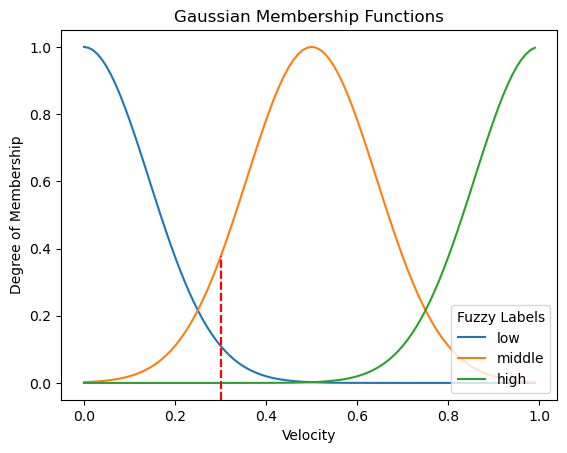

<Figure size 1000x600 with 0 Axes>

In [129]:
max_vals = 1
centers = center_init(1,3)

widths = widths_init(1,3)
print("centers", widths)

def visuMFs( max_value, mf_names=["low", "middle", "high"]):
    """Visualizing the current MFs
visuMFs(inputMFs, self.arc, dir="before_training", func="inputMFs")
inputMFs.mf_type, inputMFs.n_mfs, inputMFs.centers, inputMFs.widths, inputMFs.domain_input, 
Args:
        type_mf (callable): MF
        n_mfs (int): number of MFs
        centers (tensor): centers of MFs
        widths (tensor): widths of MF
        domain_input (int): upper boundary of the domain of the input 
        file_name (str): name of plot that will be saved in analysis folder 
    """
    n_mfs = 3
    


    x = np.arange(0, max_value, 0.01)
    y = {}

    for mfID in range(n_mfs):
        print("honk",widths[mfID])
        y[mfID] = []#MF_gaussian(x,centers[mfID],widths[mfID])

        for bleh in x:
             y[mfID].append(MF_gaussian(bleh,centers[mfID],widths[mfID]))

        plt.plot(x, y[mfID], label=mf_names[mfID])

        #  print("hui", c[xID][mfID])
      #  plt.axvline(0.3,0,0.39, c="red", ls='--')


        plt.legend(loc="lower right", title="Fuzzy Labels")

        plt.title('Gaussian Membership Functions')
        plt.ylabel('Degree of Membership')
        plt.xlabel("Velocity")
    #plt.savefig("myimage.jpg", dpi=1200)
    return plt


       
plt = visuMFs(max_vals)
plt.figure(figsize=(10,6))
plt.savefig("myimage.jpg", dpi=1200)
plt.show()